## Import relevant packages

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
sns.set()

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

## Load the data

In [190]:
data = pd.read_csv("1.04.+Real-life+example abc.csv")
data

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4
...,...,...,...,...,...,...,...,...,...
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,S 350
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985,520
4343,Toyota,14200.0,sedan,31,NaN,Petrol,yes,2014,Corolla


In [191]:
data.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


## Preprocessing the data

## Dropping Variables

In [196]:
data = data.drop(['Brand'],axis = 1)

In [197]:
data = data.drop(['Body'],axis = 1)

## Dealing with missing values

In [198]:
data.isnull().sum()

Price           172
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
Model             0
dtype: int64

In [199]:
data_no_mv = data.dropna(axis=0)
data_no_mv.isnull().sum()

Price           0
Mileage         0
EngineV         0
Engine Type     0
Registration    0
Year            0
Model           0
dtype: int64

## Exploring the PDFs

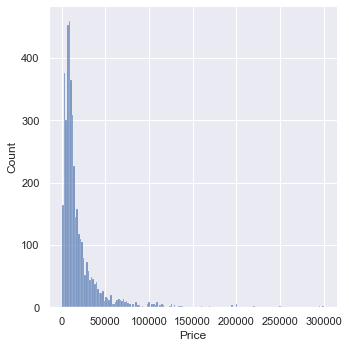

In [200]:
sns.displot(data['Price'])

## Removing the outliers

<AxesSubplot:xlabel='Price', ylabel='Count'>

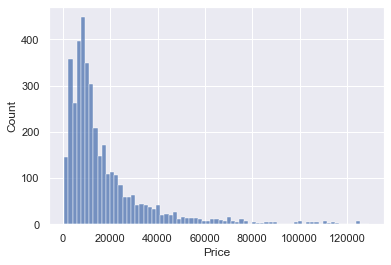

In [201]:
q = data_no_mv['Price'].quantile(0.99)
data1 = data_no_mv[data_no_mv['Price']<q]
sns.histplot(data1["Price"])

<AxesSubplot:xlabel='EngineV', ylabel='Count'>

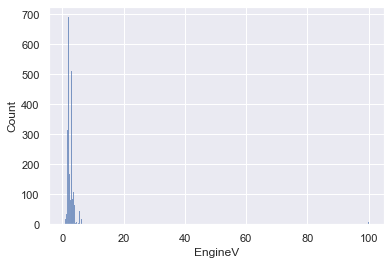

In [202]:
data2 = data1[data1['EngineV']<6.5]
sns.histplot(data1["EngineV"])

In [203]:
data2.describe(include='all')

,Price,Mileage,EngineV,Engine Type,Registration,Year,Model
count,3961.000000,3961.000000,3961.000000,3961,3961,3961.000000,3961
unique,NaN,NaN,NaN,4,2,NaN,301
top,NaN,NaN,NaN,Diesel,yes,NaN,E-Class
freq,NaN,NaN,NaN,1846,3596,NaN,188
mean,17890.545307,164.935370,2.442704,NaN,NaN,2006.308255,NaN
std,19009.523529,102.848849,0.944481,NaN,NaN,6.673304,NaN
min,600.000000,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,6999.000000,93.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,11500.000000,160.000000,2.200000,NaN,NaN,2007.000000,NaN
75%,21200.000000,230.000000,3.000000,NaN,NaN,2011.000000,NaN


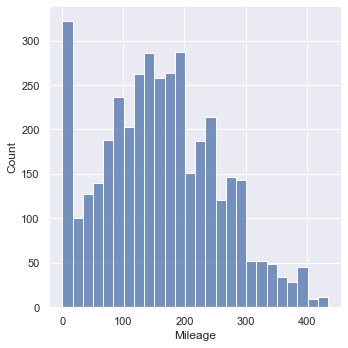

In [204]:
q = data2['Mileage'].quantile(0.99)
data3 = data2[data2['Mileage']<q]
sns.displot(data3["Mileage"])

In [205]:
data3.describe(include='all')

,Price,Mileage,EngineV,Engine Type,Registration,Year,Model
count,3921.000000,3921.000000,3921.000000,3921,3921,3921.000000,3921
unique,NaN,NaN,NaN,4,2,NaN,298
top,NaN,NaN,NaN,Diesel,yes,NaN,E-Class
freq,NaN,NaN,NaN,1818,3559,NaN,185
mean,17988.421311,161.279776,2.443497,NaN,NaN,2006.406019,NaN
std,19041.658686,96.068269,0.946198,NaN,NaN,6.595871,NaN
min,600.000000,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,7000.000000,92.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,11500.000000,158.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,21500.000000,229.000000,3.000000,NaN,NaN,2012.000000,NaN


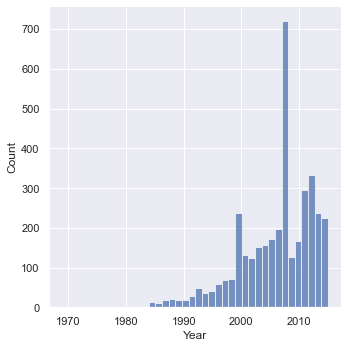

In [210]:
q = data3['Year'].quantile(0.99)
data4 = data3[data3['Year']<q]
sns.displot(data4["Year"])

In [212]:
data_cleaned = data4.reset_index(drop=True)
data_cleaned.describe(include='all')

,Price,Mileage,EngineV,Engine Type,Registration,Year,Model
count,3735.000000,3735.000000,3735.000000,3735,3735,3735.000000,3735
unique,NaN,NaN,NaN,4,2,NaN,289
top,NaN,NaN,NaN,Diesel,yes,NaN,E-Class
freq,NaN,NaN,NaN,1694,3373,NaN,185
mean,15955.230091,169.234806,2.446838,NaN,NaN,2005.928246,NaN
std,15479.713419,91.395576,0.951427,NaN,NaN,6.392131,NaN
min,600.000000,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,6900.000000,101.000000,1.800000,NaN,NaN,2002.000000,NaN
50%,10950.000000,162.000000,2.200000,NaN,NaN,2007.000000,NaN
75%,19500.000000,230.500000,3.000000,NaN,NaN,2011.000000,NaN


## Checking OLS assumptions

## Linearity

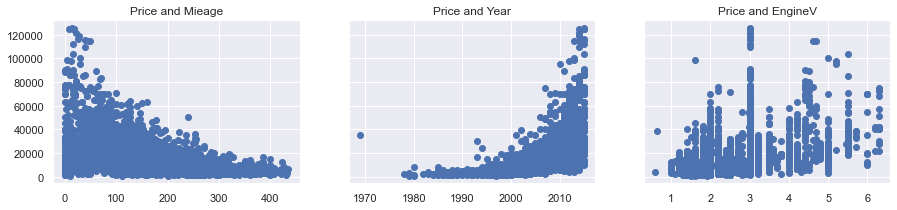

In [213]:
f, (ax1,ax2,ax3) = plt.subplots(1,3,sharey=True,figsize=(15,3))
ax1.scatter(data_cleaned['Mileage'],data_cleaned['Price'])
ax1.set_title('Price and Mieage')
ax2.scatter(data_cleaned['Year'],data_cleaned['Price'])
ax2.set_title('Price and Year')
ax3.scatter(data_cleaned['EngineV'],data_cleaned['Price'])
ax3.set_title('Price and EngineV')
plt.show()



In [214]:
log_price = np.log(data_cleaned['Price'])
data_cleaned['log_price'] = log_price

## Multicollinearity via VIF

In [215]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_cleaned[['Mileage','Price','Year']]
vif = pd.DataFrame()

# here we make use of the variance_inflation_factor, which will basically output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
# Finally, I like to include names so it is easier to explore the result
vif["Features"] = variables.columns


In [216]:
vif

,VIF,Features
0,5.915170,Mileage
1,2.784706,Price
2,9.608006,Year


## Create Dummy Variables

In [225]:
data_with_dummies = pd.get_dummies(data_cleaned, drop_first=True)

In [236]:
data_with_dummies

,Price,Mileage,EngineV,Year,log_price,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes,Model_100,...,Model_Vito,Model_X1,Model_X3,Model_X5,Model_X5 M,Model_X6,Model_X6 M,Model_Yaris,Model_Z3,Model_Z4
0,4200.0,277,2.0,1991,8.342840,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,7900.0,427,2.9,1999,8.974618,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,13300.0,358,5.0,2003,9.495519,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,23000.0,240,4.2,2007,10.043249,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,18300.0,120,2.0,2011,9.814656,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3730,17900.0,35,1.6,2014,9.792556,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3731,125000.0,9,3.0,2014,11.736069,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3732,6500.0,1,3.5,1999,8.779557,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3733,8000.0,194,2.0,1985,8.987197,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [237]:
data_with_dummies.columns.values

array(['Price', 'Mileage', 'EngineV', 'Year', 'log_price',
       'Engine Type_Gas', 'Engine Type_Other', 'Engine Type_Petrol',
       'Registration_yes', 'Model_100', 'Model_11', 'Model_116',
       'Model_118', 'Model_120', 'Model_19', 'Model_190', 'Model_200',
       'Model_21', 'Model_210', 'Model_220', 'Model_230', 'Model_25',
       'Model_250', 'Model_300', 'Model_316', 'Model_318', 'Model_320',
       'Model_323', 'Model_325', 'Model_328', 'Model_330', 'Model_335',
       'Model_428', 'Model_4Runner', 'Model_5', 'Model_5 Series',
       'Model_5 Series GT', 'Model_520', 'Model_523', 'Model_524',
       'Model_525', 'Model_528', 'Model_530', 'Model_535', 'Model_540',
       'Model_545', 'Model_550', 'Model_6 Series Gran Coupe', 'Model_630',
       'Model_640', 'Model_645', 'Model_650', 'Model_730', 'Model_735',
       'Model_740', 'Model_745', 'Model_750', 'Model_760', 'Model_80',
       'Model_9', 'Model_90', 'Model_A 140', 'Model_A 150', 'Model_A 170',
       'Model_A 180', 'M

In [238]:
cols = ['Price', 'Mileage', 'EngineV', 'Year', 'log_price',
       'Engine Type_Gas', 'Engine Type_Other', 'Engine Type_Petrol',
       'Registration_yes', 'Model_100', 'Model_11', 'Model_116',
       'Model_118', 'Model_120', 'Model_19', 'Model_190', 'Model_200',
       'Model_21', 'Model_210', 'Model_220', 'Model_230', 'Model_25',
       'Model_250', 'Model_300', 'Model_316', 'Model_318', 'Model_320',
       'Model_323', 'Model_325', 'Model_328', 'Model_330', 'Model_335',
       'Model_428', 'Model_4Runner', 'Model_5', 'Model_5 Series',
       'Model_5 Series GT', 'Model_520', 'Model_523', 'Model_524',
       'Model_525', 'Model_528', 'Model_530', 'Model_535', 'Model_540',
       'Model_545', 'Model_550', 'Model_6 Series Gran Coupe', 'Model_630',
       'Model_640', 'Model_645', 'Model_650', 'Model_730', 'Model_735',
       'Model_740', 'Model_745', 'Model_750', 'Model_760', 'Model_80',
       'Model_9', 'Model_90', 'Model_A 140', 'Model_A 150', 'Model_A 170',
       'Model_A 180', 'Model_A1', 'Model_A3', 'Model_A4',
       'Model_A4 Allroad', 'Model_A5', 'Model_A6', 'Model_A6 Allroad',
       'Model_A7', 'Model_A8', 'Model_ASX', 'Model_Amarok', 'Model_Auris',
       'Model_Avalon', 'Model_Avensis', 'Model_Aygo', 'Model_B 170',
       'Model_B 180', 'Model_B 200', 'Model_Beetle', 'Model_Bora',
       'Model_C-Class', 'Model_CL 180', 'Model_CL 500', 'Model_CL 55 AMG',
       'Model_CL 550', 'Model_CL 63 AMG', 'Model_CLA 200',
       'Model_CLA 220', 'Model_CLA-Class', 'Model_CLC 180',
       'Model_CLC 200', 'Model_CLK 200', 'Model_CLK 220', 'Model_CLK 230',
       'Model_CLK 240', 'Model_CLK 280', 'Model_CLK 320', 'Model_CLK 430',
       'Model_CLS 350', 'Model_CLS 500', 'Model_CLS 63 AMG',
       'Model_Caddy', 'Model_Camry', 'Model_Caravelle', 'Model_Carina',
       'Model_Carisma', 'Model_Celica', 'Model_Clio', 'Model_Colt',
       'Model_Corolla', 'Model_Corolla Verso', 'Model_Cross Touran',
       'Model_Duster', 'Model_E-Class', 'Model_Eclipse', 'Model_Eos',
       'Model_Espace', 'Model_FJ Cruiser', 'Model_Fluence',
       'Model_Fortuner', 'Model_G 320', 'Model_G 350', 'Model_G 500',
       'Model_G 55 AMG', 'Model_G 63 AMG', 'Model_GL 320', 'Model_GL 350',
       'Model_GL 420', 'Model_GL 450', 'Model_GL 500', 'Model_GL 550',
       'Model_GLK 220', 'Model_GLK 300', 'Model_Galant', 'Model_Golf GTI',
       'Model_Golf II', 'Model_Golf III', 'Model_Golf IV',
       'Model_Golf Plus', 'Model_Golf V', 'Model_Golf VI',
       'Model_Golf VII', 'Model_Golf Variant', 'Model_Grand Scenic',
       'Model_Grandis', 'Model_Hiace', 'Model_Highlander', 'Model_Hilux',
       'Model_I3', 'Model_IQ', 'Model_Jetta', 'Model_Kangoo',
       'Model_Koleos', 'Model_L 200', 'Model_LT', 'Model_Laguna',
       'Model_Lancer', 'Model_Lancer Evolution', 'Model_Lancer X',
       'Model_Lancer X Sportback', 'Model_Land Cruiser 100',
       'Model_Land Cruiser 105', 'Model_Land Cruiser 200',
       'Model_Land Cruiser 76', 'Model_Land Cruiser 80',
       'Model_Land Cruiser Prado', 'Model_Latitude', 'Model_Lite Ace',
       'Model_Logan', 'Model_Lupo', 'Model_M5', 'Model_M6', 'Model_MB',
       'Model_ML 250', 'Model_ML 270', 'Model_ML 280', 'Model_ML 320',
       'Model_ML 350', 'Model_ML 400', 'Model_ML 430', 'Model_ML 500',
       'Model_ML 550', 'Model_ML 63 AMG', 'Model_Mark II', 'Model_Master',
       'Model_Matrix', 'Model_Megane', 'Model_Modus', 'Model_Multivan',
       'Model_New Beetle', 'Model_Outlander', 'Model_Outlander XL',
       'Model_Pajero', 'Model_Pajero Pinin', 'Model_Pajero Sport',
       'Model_Pajero Wagon', 'Model_Passat B2', 'Model_Passat B3',
       'Model_Passat B4', 'Model_Passat B5', 'Model_Passat B6',
       'Model_Passat B7', 'Model_Passat B8', 'Model_Passat CC',
       'Model_Phaeton', 'Model_Pointer', 'Model_Polo', 'Model_Previa',
       'Model_Prius', 'Model_Q3', 'Model_Q5', 'Model_Q7', 'Model_R 320',
       'Model_R8', 'Model_Rav 4', 'Model_S 140', 'Model_S 250',
       'Model_S 280', 'Model_S 300', 'Model_S 320', 'Model_S 350',
       'Model_S 400', 'Model_S 430', 'Model_S 500', 'Model_S 550',
       'Model_S 600', 'Model_S 63 AMG', 'Model_S 65 AMG', 'Model_S4',
       'Model_S5', 'Model_S8', 'Model_SL 500 (550)', 'Model_SL 55 AMG',
       'Model_SLK 200', 'Model_SLK 350', 'Model_Sandero', 'Model_Scenic',
       'Model_Scion', 'Model_Scirocco', 'Model_Sequoia', 'Model_Sharan',
       'Model_Sienna', 'Model_Smart', 'Model_Space Star',
       'Model_Space Wagon', 'Model_Sprinter 208', 'Model_Sprinter 210',
       'Model_Sprinter 211', 'Model_Sprinter 212', 'Model_Sprinter 213',
       'Model_Sprinter 311', 'Model_Sprinter 312', 'Model_Sprinter 313',
       'Model_Sprinter 315', 'Model_Sprinter 316', 'Model_Sprinter 318',
       'Model_Sprinter 319', 'Model_Symbol', 'Model_Syncro',
       'Model_T2 (Transporter)', 'Model_T3 (Transporter)',
       'Model_T4 (Transporter)', 'Model_T4 (Transporter) ',
       'Model_T5 (Transporter)', 'Model_T5 (Transporter) ',
       'Model_T6 (Transporter)', 'Model_T6 (Transporter) ', 'Model_TT',
       'Model_Tacoma', 'Model_Tiguan', 'Model_Touareg', 'Model_Touran',
       'Model_Trafic', 'Model_Tundra', 'Model_Up', 'Model_V 250',
       'Model_Vaneo', 'Model_Vento', 'Model_Venza', 'Model_Viano',
       'Model_Virage', 'Model_Vista', 'Model_Vito', 'Model_X1',
       'Model_X3', 'Model_X5', 'Model_X5 M', 'Model_X6', 'Model_X6 M',
       'Model_Yaris', 'Model_Z3', 'Model_Z4']

In [239]:
data_preprocessed = data_with_dummies[cols]

In [240]:
data_preprocessed.head()

,Price,Mileage,EngineV,Year,log_price,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes,Model_100,...,Model_Vito,Model_X1,Model_X3,Model_X5,Model_X5 M,Model_X6,Model_X6 M,Model_Yaris,Model_Z3,Model_Z4
0,4200.0,277,2.0,1991,8.342840,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,7900.0,427,2.9,1999,8.974618,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,13300.0,358,5.0,2003,9.495519,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,23000.0,240,4.2,2007,10.043249,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,18300.0,120,2.0,2011,9.814656,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0


## Linear Regression Model

## Declaring variables

In [241]:
target = data_preprocessed['log_price']
inputs = data_preprocessed.drop(['log_price'],axis=1)

## Standardizing the data

In [242]:
scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [243]:
inputs_scaled = scaler.transform(inputs)
inputs_scaled

array([[-0.75949753,  1.17926521, -0.46971344, ..., -0.05434899,
        -0.01636488, -0.0366126 ],
       [-0.52044301,  2.82070226,  0.47636115, ..., -0.05434899,
        -0.01636488, -0.0366126 ],
       [-0.17155263,  2.06564122,  2.68386853, ..., -0.05434899,
        -0.01636488, -0.0366126 ],
       ...,
       [-0.61089607, -1.84097895,  1.10707755, ..., -0.05434899,
        -0.01636488, -0.0366126 ],
       [-0.51398208,  0.27100338, -0.46971344, ..., -0.05434899,
        -0.01636488, -0.0366126 ],
       [-0.15863077, -0.49500057, -0.46971344, ..., -0.05434899,
        -0.01636488, -0.0366126 ]])

## Train and test split

In [244]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(inputs_scaled,target,test_size=0.2,random_state=365)
x_test,y_test

(array([[ 0.66190771, -0.14482734,  1.63267454, ..., -0.05434899,
         -0.01636488, -0.0366126 ],
        [-0.61089607,  1.12455064,  0.37124175, ..., -0.05434899,
         -0.01636488, -0.0366126 ],
        [-0.59803881,  1.42000931, -0.25947464, ..., -0.05434899,
         -0.01636488, -0.0366126 ],
        ...,
        [-0.30077129, -0.04634112, -0.57483284, ..., -0.05434899,
         -0.01636488, -0.0366126 ],
        [-0.93394272,  1.04795025, -0.67995224, ..., -0.05434899,
         -0.01636488, -0.0366126 ],
        [ 0.3259392 , -0.42934309,  0.05588356, ..., -0.05434899,
         -0.01636488, -0.0366126 ]]),
 902     10.173515
 503      8.779557
 3108     8.809714
 3611     9.928180
 2264     9.367344
 3329    10.707729
 159      9.220291
 1241    10.778956
 2344     9.595603
 3356     7.843849
 2111     9.966462
 3135    11.018629
 2130     8.732305
 2044    10.305614
 995     10.146434
 18       8.824678
 275      8.922658
 1465     8.039157
 544      8.922658
 1729     9.

## Perform Regression

In [245]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [246]:
reg.score(x_train,y_train)

0.9586529732999345

In [254]:
reg.coef_

array([ 3.02034745e-01, -3.35609973e-03,  7.37414489e-02,  4.19646265e-01,
       -6.23821330e-03,  6.09766274e-04, -2.87913247e-03,  2.22199223e-01,
        5.17897551e-02,  5.06875747e-03,  2.13357721e-02,  2.53443863e-02,
       -5.28231245e-03,  7.64402672e-03,  3.13641740e-02,  3.20605958e-02,
        2.32345600e-03,  1.44432898e-02,  2.32478903e-02,  2.39313774e-02,
       -2.31514974e-03,  1.08975132e-02,  4.86401328e+12,  2.52416414e-02,
        6.37327168e-02,  9.52674018e-02,  2.40316803e-02,  4.00427198e-02,
        4.09512120e-02,  4.05997294e-02,  2.20059922e-02,  1.46399504e-02,
        1.62464786e-02, -2.02792225e-03,  1.86641599e-02,  2.65343766e-02,
        1.18346852e-01,  4.19011913e-02, -1.08289601e+12,  8.21262082e-02,
        5.64572113e-02,  9.51711268e-02,  5.66770717e-02,  3.03286404e-02,
        5.73095165e+11,  2.55285915e-02,  1.05380584e-02,  1.69749211e-02,
        2.12360151e-02,  2.50832607e-02, -3.27299899e+11,  7.71273270e-02,
        3.79247309e-02,  

In [255]:
reg.intercept_

60857184498.18543

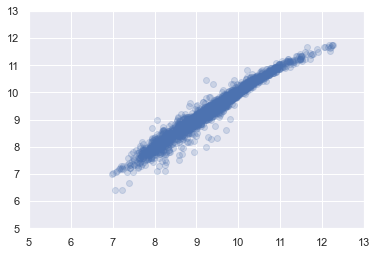

In [256]:
yhat = reg.predict(x_train)
plt.scatter(yhat,y_train,alpha=.2)
plt.xlim(5,13)
plt.ylim(5,13)
plt.show()

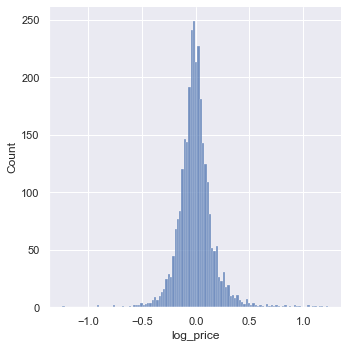

In [257]:
sns.displot(yhat-y_train)

## Testing

In [258]:
yhat_test = reg.predict(x_test)
yhat_test

array([ 1.00854874e+01,  8.87174225e+00,  9.06421661e+00,  9.91547394e+00,
        9.38726044e+00,  1.06809464e+01,  9.40280914e+00,  1.09137650e+01,
        9.59687042e+00,  7.94568634e+00,  1.00664444e+01,  1.10649490e+01,
        8.69240570e+00,  1.00721817e+01,  9.94202423e+00,  8.75763702e+00,
        8.80887604e+00,  7.51679230e+00,  9.06198883e+00,  6.55059815e+13,
        8.86069489e+00,  9.45725250e+00,  9.22794342e+00,  1.02463760e+01,
        1.04118576e+01,  8.93775177e+00,  9.55295563e+00,  8.82025909e+00,
        9.18363190e+00,  9.46894073e+00,  9.68653107e+00,  7.92142487e+00,
        8.83020782e+00,  1.01971207e+01,  7.70615387e+00,  8.71276093e+00,
        8.13956451e+00,  8.89987946e+00,  1.02917557e+01,  8.82741547e+00,
        9.27460480e+00,  9.31244659e+00,  8.99015045e+00,  9.49701691e+00,
        9.59177399e+00, -2.44354874e+13,  1.05944595e+01,  9.42395782e+00,
        9.60016632e+00,  9.91291046e+00,  1.11129379e+01,  9.76557159e+00,
        9.17350006e+00,  

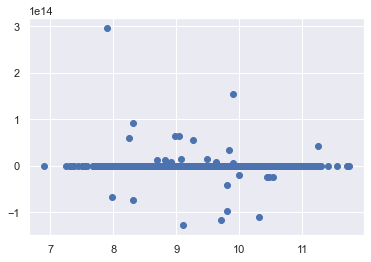

In [259]:
plt.scatter(y_test, yhat_test)

In [260]:
df_pf = pd.DataFrame(np.exp(yhat_test), columns = ['Predictions'])
df_pf

<ipython-input-260-10cea9d62466>:1: RuntimeWarning: overflow encountered in exp
  df_pf = pd.DataFrame(np.exp(yhat_test), columns = ['Predictions'])


,Predictions
0,2.399228e+04
1,7.127688e+03
2,8.640508e+03
3,2.024117e+04
4,1.193536e+04
5,4.351871e+04
6,1.212239e+04
7,5.492726e+04
8,1.471865e+04
9,2.823370e+03


In [261]:
y_test = y_test.reset_index(drop=True)
df_pf['Targets'] = np.exp(y_test)
df_pf

,Predictions,Targets
0,2.399228e+04,26200.00
1,7.127688e+03,6500.00
2,8.640508e+03,6699.00
3,2.024117e+04,20500.00
4,1.193536e+04,11700.00
5,4.351871e+04,44700.00
6,1.212239e+04,10100.00
7,5.492726e+04,48000.00
8,1.471865e+04,14700.00
9,2.823370e+03,2550.00


In [263]:
df_pf['Residual%'] = np.abs(df_pf['Predictions']-df_pf['Targets'])/df_pf['Targets']*100
df_pf

,Predictions,Targets,Residual%
0,2.399228e+04,26200.00,8.426415
1,7.127688e+03,6500.00,9.656744
2,8.640508e+03,6699.00,28.982052
3,2.024117e+04,20500.00,1.262584
4,1.193536e+04,11700.00,2.011597
5,4.351871e+04,44700.00,2.642696
6,1.212239e+04,10100.00,20.023628
7,5.492726e+04,48000.00,14.431781
8,1.471865e+04,14700.00,0.126845
9,2.823370e+03,2550.00,10.720376


In [264]:
df_pf.describe()

,Predictions,Targets,Residual%
count,7.470000e+02,747.00000,747.000000
mean,inf,16377.60992,inf
std,NaN,15635.49851,NaN
min,0.000000e+00,999.00000,0.020825
25%,6.730891e+03,6900.00000,4.386136
50%,1.104514e+04,11300.00000,9.244638
75%,2.018935e+04,20300.00000,17.301032
max,inf,125000.00000,inf


In [265]:
pd.options.display.max_rows=999
df_pf.sort_values(by='Residual%')

,Predictions,Targets,Residual%
444,4.249115e+04,42500.00,0.020825
8,1.471865e+04,14700.00,0.126845
733,1.318204e+04,13200.00,0.136077
402,2.503849e+03,2500.00,0.153958
155,1.697262e+04,16999.00,0.155160
152,6.310159e+03,6300.00,0.161246
439,1.447454e+04,14500.00,0.175560
609,3.106927e+03,3100.00,0.223457
341,2.085058e+04,20900.00,0.236461
185,3.508972e+03,3499.00,0.284987
